<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/08_Linear_Regression_SVM_Data_sfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Re-entrenamiento de Regresión lineal múltiple con los datos de Selección de características.

Realizamos los importes necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

Cargamos los datos en un df de pandas

In [ ]:
data = pd.read_csv('data_sfs.csv')

Escalamos la variable a predecir y partimos los datos en subconjuntos de train y test

In [ ]:
scaler_y = StandardScaler()

X = data.drop(columns=['TimeInShelterDays'])
y = data['TimeInShelterDays'].values.reshape(-1, 1)

y_scaled = scaler_y.fit_transform(y).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)

### Regresión lineal

Entrenamos un modelo de regresión lineal múltiple con los datos y calculamos el MAE y el R2

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
y_test_pred_real = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae_train = mean_absolute_error(scaler_y.inverse_transform(y_train.reshape(-1, 1)),
                                scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)))
mae_test = mean_absolute_error(y_test_real, y_test_pred_real)

r2_train = r2_score(scaler_y.inverse_transform(y_train.reshape(-1, 1)),
                    scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)))
r2_test = r2_score(y_test_real, y_test_pred_real)

print("MAE Train (real):", mae_train)
print("MAE Test (real):", mae_test)
print("R² Train (real):", r2_train)
print("R² Test (real):", r2_test)


MAE Train (real): 22.30351506340828
MAE Test (real): 22.112050391268074
R² Train (real): 0.004583710618843995
R² Test (real): 0.006166425927819241


Según el MAE, a comparación del MAE sin selección de características (22.22) mejoró en 0.11. Lo cual no es un gran avance.

In [ ]:
def graficar_predicciones(y_real, y_predicho, cantidad_muestras):
    plt.figure(figsize=(10, 6))
    plt.plot(y_real[:cantidad_muestras], label='Valor real', marker='o', linestyle='-')
    plt.plot(y_predicho[:cantidad_muestras], label='Valor predicho', marker='x', linestyle='--')
    media = np.mean(y_real[:cantidad_muestras])
    plt.axhline(y=media, color='gray', linestyle='--', label=f'Media: {media:.2f}')
    plt.title('Comparación entre valores reales y predichos')
    plt.xlabel('Índice')
    plt.ylabel('Días en refugio')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Graficamos las predicciones vs valores reales de la regresión lineal

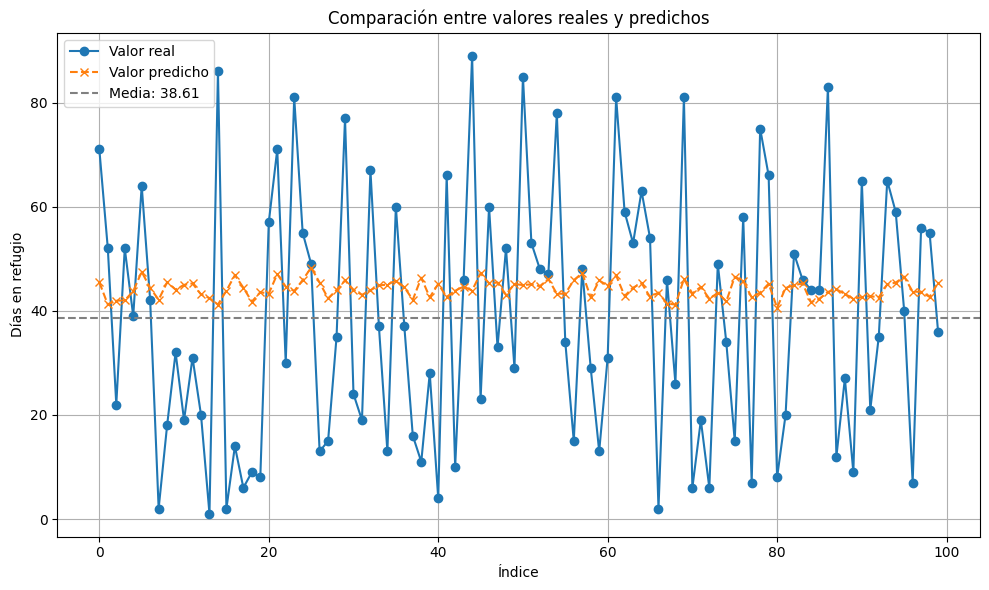

In [ ]:
graficar_predicciones(y_test_real, y_test_pred_real, 100)

### SVM
Entrenamos un SVM con los parámetros para los cuales obtuvimos un mejor MAE en el notebook 06.

In [ ]:
svr = svm.SVR(
    kernel='rbf',
    C=0.01,
    gamma='scale',
    epsilon=0.0001,
    max_iter=-1
)

In [ ]:
svr.fit(X_train, y_train)
y_pred_scaled = svr.predict(X_test)

y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

Calculamos el MAE y el R2.

In [ ]:
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)
print("MAE final: ", mae)
print("R2 final: ", r2)

MAE final:  22.158170455279812
R2 final:  -0.0018660776204175722


Respecto al MAE del notebook 06 (22.22) obtuvimos una mejora en 0.07 puntos en el MAE. No es tampoco una mejora significativa.

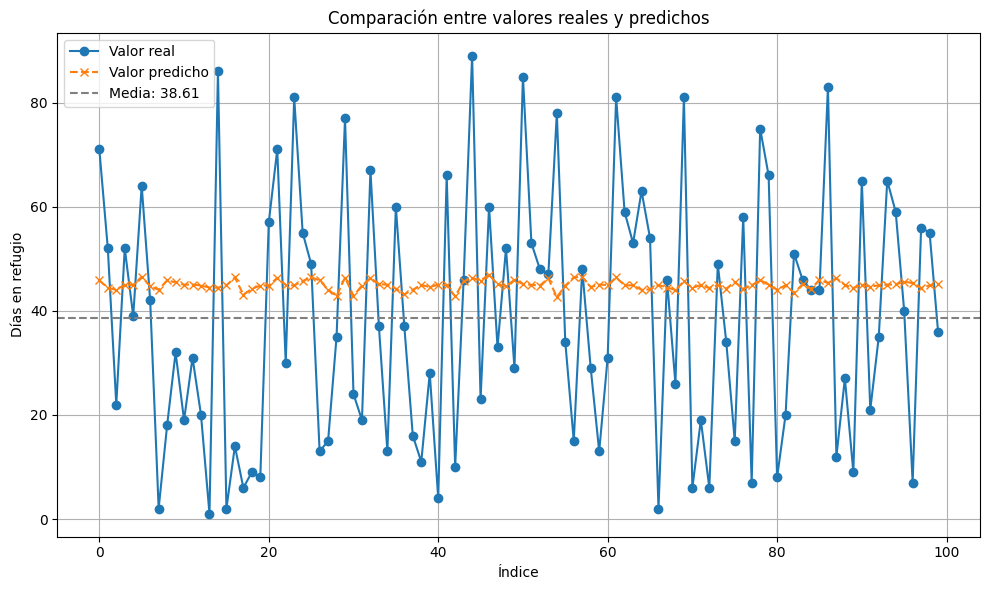

In [ ]:
graficar_predicciones(y_test_real, y_pred_real, 100)